In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import plotly as pt
import plotly.express as px
import plotly.subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium as flm

%matplotlib inline

In [2]:
pyo.init_notebook_mode(connected = True)
cf.go_offline()

# Section 01: Exploratory Data Analysis

In [3]:
df = pd.read_csv(r'C:\Users\avtap\Downloads\market.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
df.shape

(2240, 28)

# Finding Null Values 

<AxesSubplot:>

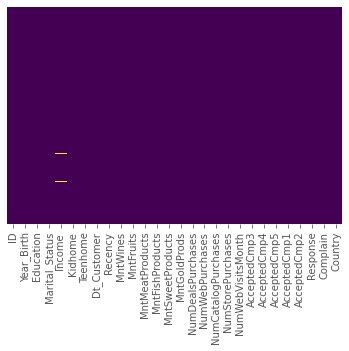

In [6]:
sns.heatmap(df.isnull() , yticklabels = False , cmap = 'viridis' , cbar = False)

In [7]:
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [8]:
df.rename(columns={' Income ': 'Income'} , inplace = True)

In [9]:
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')
df.Income = df.Income.str.rstrip()
df.Income = df.Income.astype(float)


In [10]:
df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64[ns]')

In [11]:
print(df.Income.dtypes)
print(df.Dt_Customer.dtypes)

float64
datetime64[ns]


In [12]:
df.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [13]:
df['Income'] = df['Income'].fillna((df['Income'].mean()))

<AxesSubplot:>

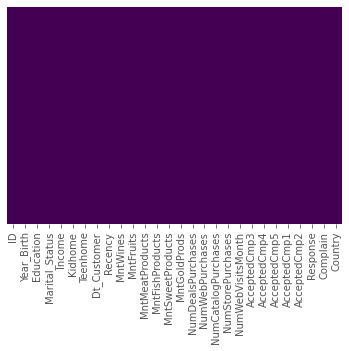

In [14]:
sns.heatmap(df.isnull() , yticklabels = False , cmap = 'viridis' , cbar = False)

# Finding Outliers

<AxesSubplot:xlabel='Complain'>

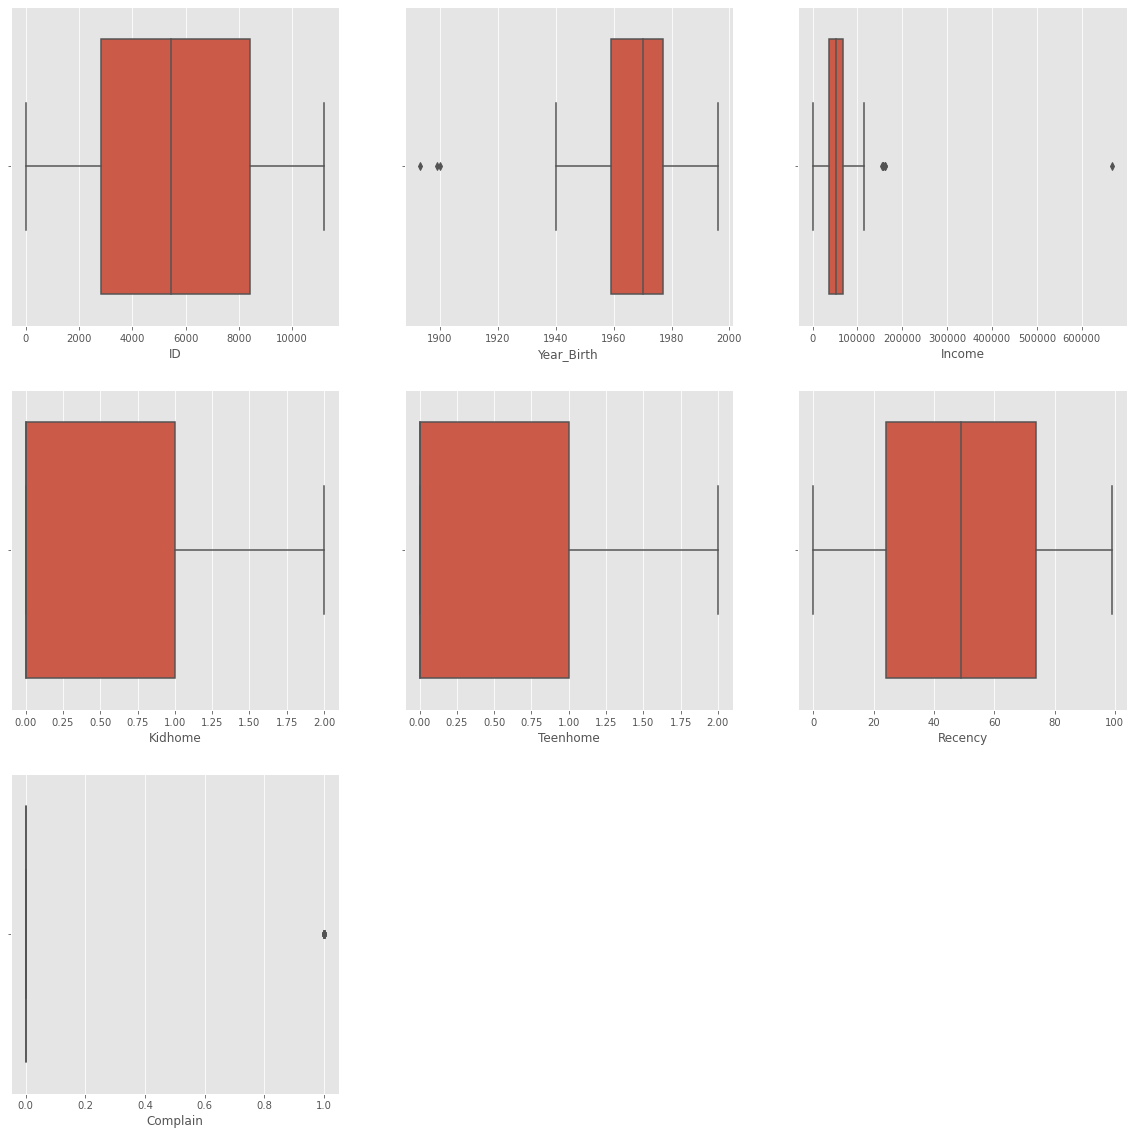

In [15]:
mp.figure(1 , figsize = (20,20))

mp.subplot(331)
sns.boxplot(data = df , x = 'ID')

mp.subplot(332)
sns.boxplot(data = df , x = 'Year_Birth')

mp.subplot(333)
sns.boxplot(data = df , x = 'Income')

mp.subplot(334)
sns.boxplot(data = df , x = 'Kidhome')

mp.subplot(335)
sns.boxplot(data = df , x = 'Teenhome')

mp.subplot(336)
sns.boxplot(data = df , x = 'Recency')

mp.subplot(337)
sns.boxplot(data = df ,x = 'Complain')



In [16]:
df[df.Income > 600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,SA


In [17]:
df.drop([527] , inplace = True)

In [18]:
df[df.Income > 150000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
325,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,1,0,0,0,0,0,0,0,SA
497,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,1,0,0,0,0,0,0,0,0,US
731,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,1,0,0,0,0,0,0,0,SP
853,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,1,0,0,0,0,0,0,0,SP
1826,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,0,0,SP
1925,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,0,0,CA
2204,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,0,0,IND


In [19]:
df[df.Year_Birth<1910]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,SA
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,SP
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,0,1,IND


In [20]:
df.drop([513 , 827 , 2232] , inplace = True)

<AxesSubplot:xlabel='MntGoldProds'>

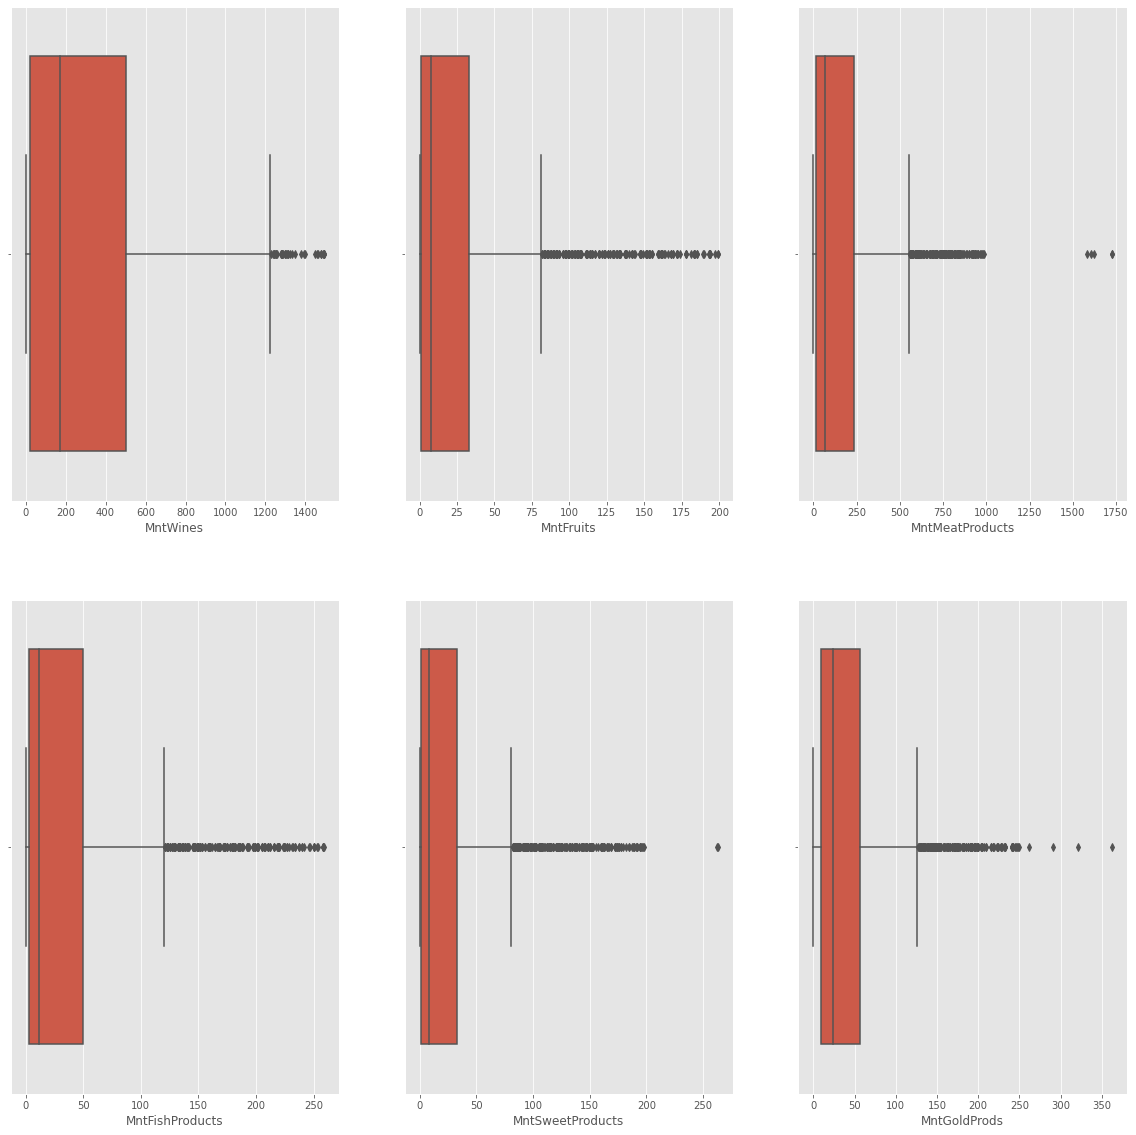

In [21]:
mp.figure(1 , figsize = (20,20))

mp.subplot(231)
sns.boxplot(data = df , x = 'MntWines')

mp.subplot(232)
sns.boxplot(data = df , x = 'MntFruits')

mp.subplot(233)
sns.boxplot(data = df , x = 'MntMeatProducts') 

mp.subplot(234)
sns.boxplot(data = df , x = 'MntFishProducts')

mp.subplot(235)
sns.boxplot(data = df , x = 'MntSweetProducts')

mp.subplot(236)
sns.boxplot(data = df , x = 'MntGoldProds')


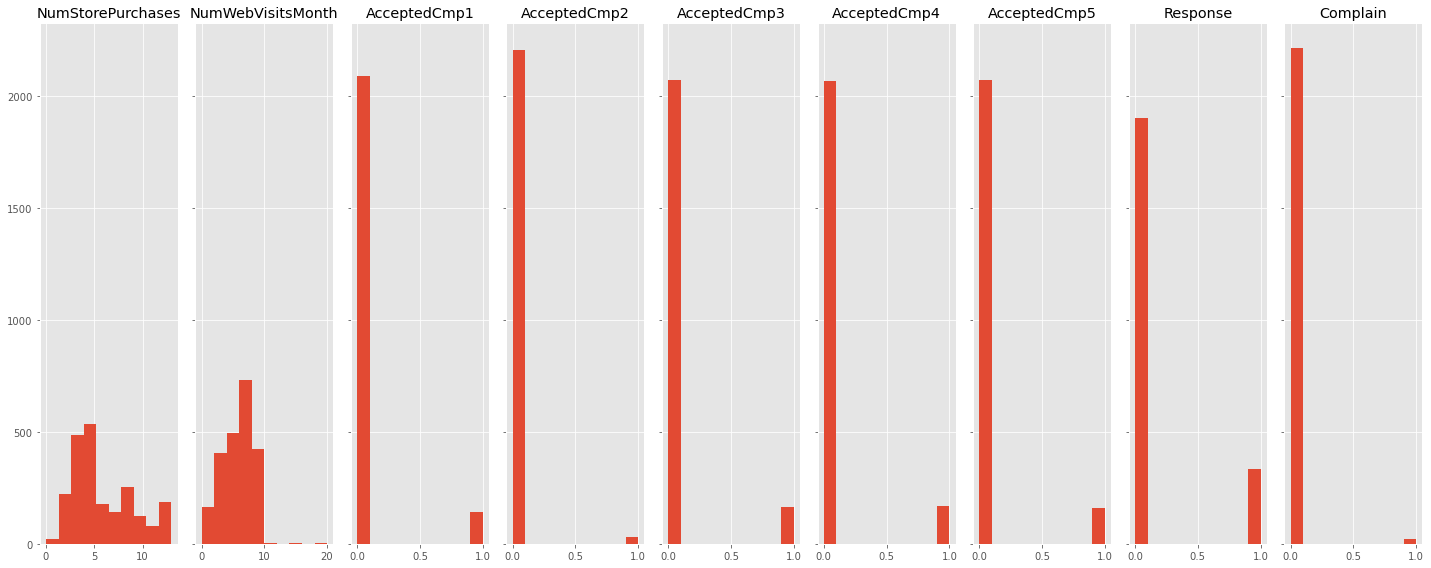

In [22]:
fig, axs = mp.subplots(1, 9, sharey = True, tight_layout=True , figsize = (20,8))

axs[0].hist(x = df['NumStorePurchases'])
axs[0].title.set_text('NumStorePurchases')

axs[1].hist(x = df['NumWebVisitsMonth'])
axs[1].title.set_text('NumWebVisitsMonth')

axs[2].hist(x = df['AcceptedCmp1'])
axs[2].title.set_text('AcceptedCmp1')

axs[3].hist(x = df['AcceptedCmp2'])
axs[3].title.set_text('AcceptedCmp2')

axs[4].hist(x = df['AcceptedCmp3'])
axs[4].title.set_text('AcceptedCmp3')

axs[5].hist(x = df['AcceptedCmp4'])
axs[5].title.set_text('AcceptedCmp4')

axs[6].hist(x = df['AcceptedCmp5'])
axs[6].title.set_text('AcceptedCmp5')

axs[7].hist(x = df['Response'])
axs[7].title.set_text('Response')

axs[8].hist(x = df['Complain'])
axs[8].title.set_text('Complain')

# Feature Engineering

In [23]:
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntFishProducts'] +df['MntGoldProds']

In [24]:
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

In [25]:
df['TotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases']

# Section 02: Statistical Analysis

# Factors related to the number of store purchases

In [68]:
NumStorePurchases = df.NumStorePurchases.unique()

In [27]:
NumStorePurchases = np.array([ 6,  7,  5,  2,  3,  9, 10,  0,  8,  4, 13, 12,  1, 11])
print(np.sort(NumStorePurchases))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


1. Number of Kids/Teens/Total Children at Home

In [28]:
NumStorePurchases_Kidhome = df.groupby('Kidhome').sum()['NumStorePurchases'].reset_index()
NumStorePurchases_Kidhome

,Kidhome,NumStorePurchases
0,0,9323
1,1,3470
2,2,165


In [29]:
NumStorePurchases_Teenhome = df.groupby('Teenhome').sum()['NumStorePurchases'].reset_index()
NumStorePurchases_Teenhome

,Teenhome,NumStorePurchases
0,0,6521
1,1,6112
2,2,325


In [30]:
NumStorePurchases_TotalChildren= df.groupby('TotalChildren').sum()['NumStorePurchases'].reset_index()
NumStorePurchases_TotalChildren

,TotalChildren,NumStorePurchases
0,0,4631
1,1,6302
2,2,1815
3,3,210


In [71]:
fig = make_subplots(rows=1, cols=3, shared_yaxes=True  , subplot_titles=("Number of Kids at home", "Number of Teens at home", "Total Children"))

fig.add_trace(go.Bar(x=NumStorePurchases_Kidhome['Kidhome'], y=NumStorePurchases_Kidhome['NumStorePurchases'],marker=dict(color='darkorange')),1, 1)

fig.add_trace(go.Bar(x=NumStorePurchases_Teenhome['Teenhome'], y=NumStorePurchases_Teenhome['NumStorePurchases'],marker=dict(color='darkorange')),1, 2)

fig.add_trace(go.Bar(x=NumStorePurchases_TotalChildren['TotalChildren'], y=NumStorePurchases_TotalChildren['NumStorePurchases'],marker=dict(color='darkorange')),1, 3)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r') , yaxis_title ='Number of Store Purchases', title_text="How number of children at home and their age affect Number of Store Purchases" ,showlegend=False)
fig.show()

2. Marital Status

In [32]:
Marital_Status = df.groupby('Marital_Status').sum()['NumStorePurchases'].reset_index()

Marital_Status

,Marital_Status,NumStorePurchases
0,Absurd,13
1,Alone,12
2,Divorced,1350
3,Married,5055
4,Single,2705
5,Together,3320
6,Widow,491
7,YOLO,12


In [33]:
px.bar(Marital_Status ,x = 'Marital_Status' , y = 'NumStorePurchases' , title = 'How marital status affect the number of purschases')

3. Education

In [34]:
Education = df.groupby('Education').sum()['NumStorePurchases'].reset_index()

Education

,Education,NumStorePurchases
0,2n Cycle,1116
1,Basic,154
2,Graduation,6564
3,Master,2182
4,PhD,2942


In [35]:
px.bar(Education ,x = 'Education' , y = 'NumStorePurchases' , title = 'How Education affect the number of purschases')

3. Age Group

In [36]:
df.Year_Birth.unique()

array([1970, 1961, 1958, 1967, 1989, 1954, 1947, 1979, 1959, 1981, 1969,
       1977, 1960, 1966, 1976, 1965, 1956, 1975, 1971, 1986, 1972, 1974,
       1990, 1987, 1984, 1968, 1955, 1983, 1973, 1978, 1952, 1962, 1964,
       1982, 1963, 1957, 1980, 1945, 1949, 1948, 1953, 1946, 1985, 1992,
       1944, 1951, 1988, 1950, 1994, 1993, 1991, 1996, 1995, 1943, 1941,
       1940, 1900], dtype=int64)

In [37]:
A = df.groupby('Year_Birth').sum()['NumStorePurchases'].reset_index()

A

,Year_Birth,NumStorePurchases
0,1900,2
1,1940,4
2,1941,5
3,1943,62
4,1944,58
5,1945,52
6,1946,121
7,1947,125
8,1948,130
9,1949,211


In [38]:
Year_Birth = df.groupby('Year_Birth')['NumStorePurchases'].sum().sort_values(ascending = False).to_frame()

Year_Birth.style.background_gradient(cmap ='Pastel1_r')

,NumStorePurchases
Year_Birth,
1976,491
1975,474
1971,464
1970,463
1965,438
1972,435
1969,410
1978,407
1956,383


In [39]:
px.bar(A , x = 'Year_Birth' , y = 'NumStorePurchases')

4. Income

In [40]:
B = df.groupby('Income').sum()['NumStorePurchases'].reset_index()

B

,Income,NumStorePurchases
0,1730.0,0
1,2447.0,0
2,3502.0,0
3,4023.0,0
4,4428.0,0
...,...,...
1967,157146.0,0
1968,157243.0,0
1969,157733.0,1
1970,160803.0,1


In [41]:
fig = px.scatter(B, x="Income", y ='NumStorePurchases')
fig.show()

5. Country

In [42]:
Country = df.groupby('Country').sum()['NumStorePurchases'].reset_index()

Country

,Country,NumStorePurchases
0,AUS,879
1,CA,1568
2,GER,721
3,IND,785
4,ME,19
5,SA,1983
6,SP,6345
7,US,658


In [43]:
px.bar(Country , x = 'Country' , y = 'NumStorePurchases')

# US Purchases vs World Purchases

In [74]:
Country_TotalPurchases = df.groupby('Country').sum()['TotalPurchases'].reset_index()

Country_TotalPurchases

,Country,TotalPurchases
0,AUS,1435
1,CA,2533
2,GER,1067
3,IND,1314
4,ME,40
5,SA,3119
6,SP,9685
7,US,1103


In [75]:
px.bar(Country_TotalPurchases , x = 'Country' , y = 'TotalPurchases')

# Relationship between Buying Gold and In-Store Purchases

In [44]:
MntGoldProds= df.groupby('MntGoldProds').sum()['NumStorePurchases'].reset_index()

In [45]:
MntGoldProds

,MntGoldProds,NumStorePurchases
0,0,311
1,1,176
2,2,183
3,3,215
4,4,242
...,...,...
208,249,4
209,262,1
210,291,1
211,321,0


In [46]:
fig = px.scatter(MntGoldProds , x = 'NumStorePurchases' , y = 'MntGoldProds')
fig.show()

# Are Married PhD customers buying more Fish Products ?

In [47]:
MntFishProducts = df.groupby('Education').sum()['MntFishProducts'].reset_index()

In [48]:
MntFishProducts

,Education,MntFishProducts
0,2n Cycle,9632
1,Basic,921
2,Graduation,48620
3,Master,11877
4,PhD,12886


In [49]:
MntFishProducts.iplot(x = 'Education' , y = 'MntFishProducts' , kind = 'bar')

In [50]:
MntFishProducts_Marital_Status =  df.groupby('Marital_Status').sum()['MntFishProducts'].reset_index()

In [51]:
MntFishProducts_Marital_Status

,Marital_Status,MntFishProducts
0,Absurd,411
1,Alone,23
2,Divorced,8130
3,Married,30569
4,Single,18337
5,Together,22503
6,Widow,3955
7,YOLO,8


In [52]:
MntFishProducts_Marital_Status.iplot(x = 'Marital_Status' , y = 'MntFishProducts' , kind = 'bar')

# Other factors related to amount spent on fish

1. Number of Children at Home

In [53]:
TotalChildren_MntFishProducts = df.groupby('TotalChildren').sum()['MntFishProducts'].reset_index()

TotalChildren_MntFishProducts

,TotalChildren,MntFishProducts
0,0,48733
1,1,30034
2,2,4794
3,3,375


In [54]:
px.bar(TotalChildren_MntFishProducts , x = 'TotalChildren' , y = 'MntFishProducts' )

2. Income

In [55]:
px.scatter( df ,x = 'Income' , y = 'MntFishProducts' )

# Relationship between geographical region and success of a campaign

In [56]:
df.Country.unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [57]:
AcceptedCmp1 = df.groupby('Country').sum()['AcceptedCmp1'].reset_index()
AcceptedCmp2 = df.groupby('Country').sum()['AcceptedCmp2'].reset_index()
AcceptedCmp3 = df.groupby('Country').sum()['AcceptedCmp3'].reset_index()
AcceptedCmp4 = df.groupby('Country').sum()['AcceptedCmp4'].reset_index()
AcceptedCmp5 = df.groupby('Country').sum()['AcceptedCmp5'].reset_index()
Response = df.groupby('Country').sum()['Response'].reset_index()

In [58]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = AcceptedCmp1['Country'], y = AcceptedCmp1['AcceptedCmp1'],
                        mode = 'lines+markers',
                        name = 'AcceptedCmp1',
                        line = dict(color = 'yellowgreen'  ,width = 2)))

fig.add_trace(go.Scatter(x = AcceptedCmp2['Country'], y = AcceptedCmp2['AcceptedCmp2'],
                        mode = 'lines+markers',
                        name = 'AcceptedCmp2',
                        line = dict(color = 'red'  ,width = 2)))

fig.add_trace(go.Scatter(x = AcceptedCmp3['Country'], y = AcceptedCmp3['AcceptedCmp3'],
                        mode = 'lines+markers',
                        name = 'AcceptedCmp3',
                        line = dict(color = 'olive'  ,width = 2)))

fig.add_trace(go.Scatter(x = AcceptedCmp4['Country'], y = AcceptedCmp4['AcceptedCmp4'],
                        mode = 'lines+markers',
                        name = 'AcceptedCmp4',
                        line = dict(color = 'magenta'  ,width = 2)))

fig.add_trace(go.Scatter(x = AcceptedCmp5['Country'], y = AcceptedCmp5['AcceptedCmp5'],
                        mode = 'lines+markers',
                        name = 'AcceptedCmp5',
                        line = dict(color = 'blue'  ,width = 2)))

fig.add_trace(go.Scatter(x = Response['Country'], y = Response['Response'],
                        mode = 'lines+markers',
                        name = 'Response',
                        line = dict(color = 'darkorange'  ,width = 2)))

fig.update_layout(title_text="Success of Campaign in different Countries" , xaxis_title ='Country' ,yaxis_title="Total Offers accepted by Customers")
fig.show()

# Section 03: Data Visualization

# Most Successful Marketing Campaign

In [59]:
ac1 = (df.AcceptedCmp1.sum())
ac2 = (df.AcceptedCmp2.sum())
ac3 = (df.AcceptedCmp3.sum())
ac4 = (df.AcceptedCmp4.sum())
ac5 = (df.AcceptedCmp5.sum())
rsp = (df.Response.sum())

In [60]:
fig  = px.bar(x = ['AcceptedCmp1' , 'AcceptedCmp2' , 'AcceptedCmp3' ,'AcceptedCmp4' , 'AcceptedCmp5' , 'Response'] , 
      y = [ac1 , ac2 , ac3 , ac4 , ac5 , rsp])

fig.update_xaxes(title_text='Marketing Campaign')
fig.update_yaxes(title_text='Total Offers accepted by Customers')
fig.update_layout(title = 'Success of Marketing Campaigns')

fig.show()

# An average customer is from SP, born between the years 1970 and 1980 with a Graduation and married with 0 kids.

# Best Performing Products

In [61]:
Wine = df.MntWines.sum()
Fruits = df.MntFruits.sum()
Meat = df.MntMeatProducts.sum()
Fish = df.MntFishProducts.sum()
Sweet = df.MntSweetProducts.sum()
Gold = df.MntGoldProds.sum()

In [62]:
fig = go.Figure(data = go.Scatter(x=['Wine' , 'Fruits' , 'Meat' , 'Fish' , 'Sweet' , 'Gold'],
                         y=[Wine , Fruits , Meat , Fish , Sweet, Gold],
                         mode='lines+markers' ,
                         marker = dict(size = 30)))

fig.update_xaxes(title_text = 'Products')
fig.update_yaxes(title_text = 'Amount Spent')

fig.update_layout(title = 'Product Performance')

# Countries with most Purchases depicted through a Stamen terrain map

In [63]:
TotalPurchases_Country = df.groupby('Country')['TotalPurchases'].sum().reset_index()

In [64]:
d = {'Country': ['AUS', 'CA' , 'GER' , 'IND' , 'ME' , 'SA' ,'SP' , 'US'],
     'Latitude': [-25.274398, 56.1304 ,51.1657,20.5937,42.7087,30.5595,40.4637,37.0902],
    'Longitude' : [133.7751,-106.346771,10.4515,78.9629,19.3744,22.9375,-3.7492,-95.7129]}
long_lat = pd.DataFrame(data=d)
long_lat

,Country,Latitude,Longitude
0,AUS,-25.274398,133.775100
1,CA,56.130400,-106.346771
2,GER,51.165700,10.451500
3,IND,20.593700,78.962900
4,ME,42.708700,19.374400
5,SA,30.559500,22.937500
6,SP,40.463700,-3.749200
7,US,37.090200,-95.712900


In [65]:
Country_latlong = pd.merge(TotalPurchases_Country , long_lat , on = 'Country')

Country_latlong

,Country,TotalPurchases,Latitude,Longitude
0,AUS,1435,-25.274398,133.775100
1,CA,2533,56.130400,-106.346771
2,GER,1067,51.165700,10.451500
3,IND,1314,20.593700,78.962900
4,ME,40,42.708700,19.374400
5,SA,3119,30.559500,22.937500
6,SP,9685,40.463700,-3.749200
7,US,1103,37.090200,-95.712900


In [66]:
map = flm.Map(location = [50,50] , zoom_start = 1.5, tiles='Stamenterrain')

for lat,long,TotalPurchases,name in zip(Country_latlong['Latitude'] , Country_latlong['Longitude'] , Country_latlong['TotalPurchases'] ,Country_latlong['Country']):
    flm.CircleMarker(
        
        [lat , long],
        radius = TotalPurchases/200,
        popup = ('<strong>Country</strong>: '+str(name).capitalize()+'<br>''<strong>Total Purchases</strong>: '+str(TotalPurchases)+'<br>'),
        color = 'darkorange',
        fill_color = 'darkorange',
        fill_opacity = 0.1).add_to(map)

# Map

In [67]:
map